### Import Dataset

In [23]:
import sqlite3

In [24]:
connect = sqlite3.connect('data/noshow.db')

In [25]:
import pandas as pd

In [26]:
df = pd.read_sql_query('select * from noshow;', connect)

In [27]:
connect.close()

### EDA

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.float_format", "{:.1f}".format)

In [29]:
# create a copy
df1 = df.copy()

In [30]:
# preview dataset
df1.head()

,booking_id,no_show,branch,booking_month,arrival_month,arrival_day,checkout_month,checkout_day,country,first_time,room,price,platform,num_adults,num_children
0,94113,0.0,Changi,November,June,25.0,June,27.0,Singapore,Yes,Single,SGD$ 492.98,Website,1,0.0
1,86543,0.0,Orchard,August,November,28.0,November,29.0,Indonesia,Yes,King,SGD$ 1351.22,Website,2,0.0
2,75928,0.0,Changi,March,February,7.0,February,11.0,India,Yes,Single,None,Agent,1,0.0
3,66947,1.0,Orchard,September,October,1.0,October,3.0,China,Yes,Single,SGD$ 666.04,Website,1,0.0
4,106390,0.0,Orchard,March,June,20.0,June,24.0,Australia,Yes,Queen,USD$ 665.37,Website,1,0.0


In [31]:
# preview info
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119391 entries, 0 to 119390
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   booking_id      119391 non-null  int64  
 1   no_show         119390 non-null  float64
 2   branch          119390 non-null  object 
 3   booking_month   119390 non-null  object 
 4   arrival_month   119390 non-null  object 
 5   arrival_day     119390 non-null  float64
 6   checkout_month  119390 non-null  object 
 7   checkout_day    119390 non-null  float64
 8   country         119390 non-null  object 
 9   first_time      119390 non-null  object 
 10  room            97778 non-null   object 
 11  price           94509 non-null   object 
 12  platform        119390 non-null  object 
 13  num_adults      119390 non-null  object 
 14  num_children    119390 non-null  float64
dtypes: float64(4), int64(1), object(10)
memory usage: 13.7+ MB


In [32]:
# tabulate count of null values
df1.isnull().sum()

booking_id            0
no_show               1
branch                1
booking_month         1
arrival_month         1
arrival_day           1
checkout_month        1
checkout_day          1
country               1
first_time            1
room              21613
price             24882
platform              1
num_adults            1
num_children          1
dtype: int64

In [33]:
# tabulate percentage null values
room_percent_null = df1.isnull().sum()['room'] / len(df1) * 100
price_percent_null = df1.isnull().sum()['price'] / len(df1) * 100
print(f'Null room values represent {room_percent_null:.1f}% of the total dataset.')
print(f'Null price values represent {price_percent_null:.1f}% of the total dataset.')

Null room values represent 18.1% of the total dataset.
Null price values represent 20.8% of the total dataset.


In [34]:
# preview number of unique values
df1.nunique()
# no duplicate booking_id

booking_id        119391
no_show                2
branch                 2
booking_month         12
arrival_month         88
arrival_day           31
checkout_month        12
checkout_day          62
country                7
first_time             2
room                   4
price              61867
platform               4
num_adults             4
num_children           4
dtype: int64

In [35]:
# investigate anomaly of 88 unique values for arrival_month (there are only 12 months)
df1['arrival_month'].value_counts()
# anomaly is caused by formatting issues, presumably human error

arrival_month
August       13695
July         12515
May          11684
October      11009
April        10966
June         10787
September    10336
March         9659
February      7939
November      6679
December      6676
January       5832
MaY             62
JunE            56
JulY            52
JuNe            51
JuLy            48
JUly            46
JUne            44
MAy             44
AugusT          43
AugUst          41
AuguSt          37
MarCh           36
OCtober         36
MarcH           35
MaRch           34
AuGust          32
APril           32
ApriL           31
MArch           30
AprIl           30
OctOber         29
AUgust          29
ApRil           29
SepTember       29
SePtember       26
NoVember        24
SeptembeR       24
SepteMber       23
OctobeR         23
FebrUary        22
FebruaRy        22
OctobEr         21
FEbruary        21
OctoBer         20
NovEmber        20
OcTober         20
JanUary         19
FebruAry        19
DecembeR        19
SeptemBer       1

In [36]:
# investigate anomaly of 62 unique values for checkout_day (there are only 30-31 days)
df1['checkout_day'].value_counts().sort_values()
# anomaly is caused by negative values, presumably human error

checkout_day
-31.0      87
-5.0      145
-30.0     151
-13.0     154
-12.0     157
-8.0      164
-10.0     173
-19.0     173
-22.0     175
-24.0     177
-9.0      178
-2.0      178
-1.0      179
-23.0     179
-28.0     184
-15.0     187
-21.0     188
-6.0      190
-29.0     192
-3.0      195
-17.0     196
-25.0     198
-11.0     198
-16.0     200
-26.0     202
-4.0      203
-7.0      211
-27.0     215
-18.0     220
-14.0     220
-20.0     227
31.0     2079
30.0     3111
23.0     3290
12.0     3308
9.0      3461
2.0      3469
13.0     3497
24.0     3498
10.0     3519
8.0      3558
15.0     3576
16.0     3589
3.0      3599
26.0     3613
5.0      3641
7.0      3663
29.0     3689
21.0     3749
14.0     3763
25.0     3794
22.0     3795
19.0     3818
1.0      3892
28.0     3932
17.0     3943
6.0      3957
4.0      3972
27.0     4006
20.0     4207
18.0     4248
11.0     4458
Name: count, dtype: int64

In [37]:
# investigate anomaly of price (price is usually float dtype but dtype is object)
display(df1['price'].sample(10))
# anomaly is caused by strings SGD$ and USD$ prefixed to price

74931     SGD$ 937.55
58659     USD$ 685.62
8112      SGD$ 817.61
46743     USD$ 779.55
7143       USD$ 472.4
23870     SGD$ 945.56
91345     USD$ 632.66
55971            None
11845     USD$ 655.99
108319     SGD$ 866.3
Name: price, dtype: object

In [38]:
# investigate anomaly of num_adults (previewed values are integers but dtype is object)
df1['num_adults'].value_counts().sort_values()
# anomaly is caused by string values 'two' and 'one', presumably human error

num_adults
two     5068
one     6334
2      45243
1      62745
Name: count, dtype: int64

### Preliminary Data Cleanup
We perform preliminary cleaning of data to conduct more meaningful visualisations.

*Cleanup row with almost all null values*

In [39]:
# preview row with null values apart from booking_id
df1[df1['no_show'].isnull()]

,booking_id,no_show,branch,booking_month,arrival_month,arrival_day,checkout_month,checkout_day,country,first_time,room,price,platform,num_adults,num_children
111598,115536,NaN,None,None,None,NaN,None,NaN,None,None,None,None,None,None,NaN


In [40]:
# exclude row from dataset
df1 = df1[~df1['no_show'].isnull()]

*Cleanup arrival_month*

In [41]:
# cleanup arrival_month
df1['arrival_month'] = df1['arrival_month'].map(lambda x: x.capitalize())
# check cleanup
df1['arrival_month'].value_counts()

arrival_month
August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: count, dtype: int64

In [42]:
# create a dictionary of months and their numbers
month_dictionary = {'January': 1.0,
                   'February': 2.0,
                   'March': 3.0,
                   'April': 4.0,
                   'May': 5.0,
                   'June': 6.0,
                   'July': 7.0,
                   'August': 8.0,
                   'September': 9.0,
                   'October': 10.0,
                   'November': 11.0,
                   'December': 12.0}

In [43]:
# add a new column of numbers corresponding to months
df1['arrival_month_no'] = [month_dictionary[month] for month in df1['arrival_month'] if month in month_dictionary.keys()]

*Cleanup checkout_day*

In [44]:
# cleanup checkout_day
df1['checkout_day'] = df1['checkout_day'].map(lambda x: -1 * x if x < 0 else 1 * x)
# check cleanup
df1['checkout_day'].value_counts()

checkout_day
11.0    4656
18.0    4468
20.0    4434
27.0    4221
4.0     4175
6.0     4147
17.0    4139
28.0    4116
1.0     4071
25.0    3992
19.0    3991
14.0    3983
22.0    3970
21.0    3937
29.0    3881
7.0     3874
26.0    3815
3.0     3794
16.0    3789
5.0     3786
15.0    3763
8.0     3722
10.0    3692
24.0    3675
13.0    3651
2.0     3647
9.0     3639
23.0    3469
12.0    3465
30.0    3262
31.0    2166
Name: count, dtype: int64

*Cleanup price*

In [45]:
# cleanup price

# replace None values with '0' strings
df1['price'].fillna('0', inplace = True)

# transform strings into floats
# convert prices in USD to SGD using exchange rate 1 SGD = 0.745 USD
df1['price'] = df1['price'].map(lambda x: float(x[5:]) if 'SGD$' in x else float(x[5:]) / 0.745 if 'USD$' in x else float(x))

# check cleanup
df1.head()

,booking_id,no_show,branch,booking_month,arrival_month,arrival_day,checkout_month,checkout_day,country,first_time,room,price,platform,num_adults,num_children,arrival_month_no
0,94113,0.0,Changi,November,June,25.0,June,27.0,Singapore,Yes,Single,493.0,Website,1,0.0,6.0
1,86543,0.0,Orchard,August,November,28.0,November,29.0,Indonesia,Yes,King,1351.2,Website,2,0.0,11.0
2,75928,0.0,Changi,March,February,7.0,February,11.0,India,Yes,Single,0.0,Agent,1,0.0,2.0
3,66947,1.0,Orchard,September,October,1.0,October,3.0,China,Yes,Single,666.0,Website,1,0.0,10.0
4,106390,0.0,Orchard,March,June,20.0,June,24.0,Australia,Yes,Queen,893.1,Website,1,0.0,6.0


In [46]:
# check price statistics without 0.0 values
df2 = df1[~(df1['price'] == 0.0)]
df2['price'].describe()

count   94509.0
mean      939.6
std       263.4
min       392.0
25%       815.8
50%       903.3
75%       998.0
max      2100.0
Name: price, dtype: float64

In [47]:
# check price statistics with 0.0 values
# based on count, 24,881 values (26.3%) were originally None
df1['price'].describe()

count   119390.0
mean       743.8
std        447.8
min          0.0
25%        501.6
50%        857.4
75%        966.8
max       2100.0
Name: price, dtype: float64

In [49]:
# impute prices of 0.0 values with first median value of 903.3
df1['price'] = df1['price'].map(lambda x: x if x != 0.0 else 903.3)

In [50]:
# check price statistics after imputation
df1['price'].describe()

count   119390.0
mean       932.0
std        234.8
min        392.0
25%        838.9
50%        903.3
75%        966.8
max       2100.0
Name: price, dtype: float64

*Cleanup num_adults*

In [51]:
# cleanup num_adults
df1['num_adults'] = df1['num_adults'].map(lambda x: float(1) if x == 'one' else float(2) if x == 'two' else float(x))
# check cleanup
df1['num_adults'].value_counts()

num_adults
1.0    69079
2.0    50311
Name: count, dtype: int64

*Some formatting to date variables*

In [52]:
# add a new column of numbers corresponding to booking_month
df1['booking_month_no'] = [month_dictionary[month] for month in df1['booking_month'] if month in month_dictionary.keys()]

In [53]:
# add a new column of numbers corresponding to checkout_month
df1['checkout_month_no'] = [month_dictionary[month] for month in df1['checkout_month'] if month in month_dictionary.keys()]

In [54]:
# add a new column corresponding to months stayed
df1['months_stayed'] = df1['checkout_month_no'] - df1['arrival_month_no']
df1['months_stayed'] = df1['months_stayed'].map(lambda x: 1.0 if x == -11.0 else x)

In [55]:
# create list of values for nights stayed
alist = []

for i in range(len(df1)):
    
    if df1.iloc[i, 18] == 0.0:
        duration = df1.iloc[i, 7] - df1.iloc[i, 5]
        alist.append(duration)
    
    elif df1.iloc[i, 18] == 1.0:
        if df1.iloc[i, 4] in ('January', 'March', 'May', 'July', 'August', 'October', 'December'):
            duration = df1.iloc[i, 7] - df1.iloc[i, 5] + 31
            alist.append(duration)
            
        elif df1.iloc[i, 4] in ('April', 'June', 'September', 'November'):
            duration = df1.iloc[i, 7] - df1.iloc[i, 5] + 30
            alist.append(duration)
        
        else:
            duration = df1.iloc[i, 7] - df1.iloc[i, 5] + 28
            alist.append(duration)   
        
    elif df1.iloc[i, 18] == 2.0:
        if df1.iloc[i, 4] in ('January', 'March', 'May', 'July', 'August', 'October', 'December'):
            duration = df1.iloc[i, 7] - df1.iloc[i, 5] + 31 + 30
            alist.append(duration)
            
        elif df1.iloc[i, 4] in ('April', 'June', 'September', 'November'):
            duration = df1.iloc[i, 7] - df1.iloc[i, 5] + 30 + 31
            alist.append(duration)
        
        else:
            duration = df1.iloc[i, 7] - df1.iloc[i, 5] + 28 + 31
            alist.append(duration)

In [56]:
# add a new column corresponding to nights stayed
df1['nights_stayed'] = alist

In [57]:
# add a new column corresponding to average price per night
df1['price_per_night'] = df1['price'] / df1['nights_stayed']

### Visualisations
After the preliminary cleanup of data, we can conduct some meaningful visualisations.

In [58]:
# separate dataset into no_show classes
no_show_0 =  df1[df1['no_show'] == 0.0]
no_show_1 =  df1[df1['no_show'] == 1.0]

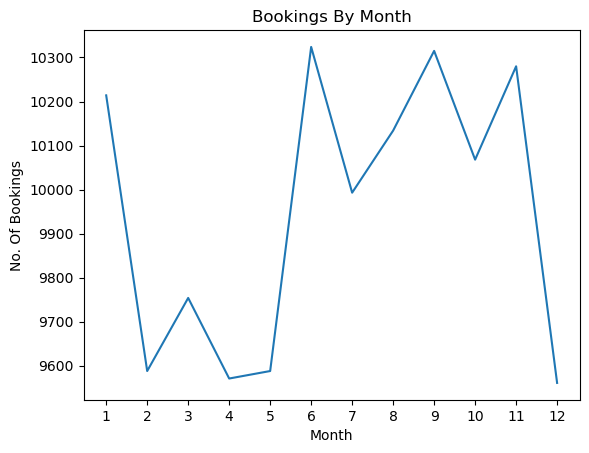

In [59]:
# visualise date variables
df1.groupby('booking_month_no').size().plot(kind = 'line')

plt.xticks(range(1, 13, 1))
plt.xlabel('Month')
plt.ylabel('No. Of Bookings')
plt.title('Bookings By Month')

plt.show()

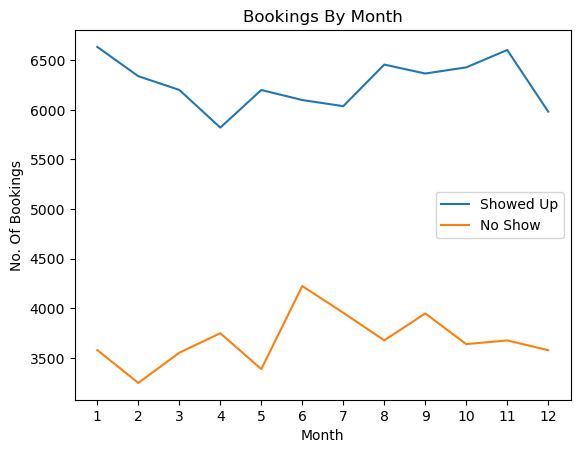

In [60]:
# visualise date variables
no_show_0.groupby('booking_month_no').size().plot(kind = 'line', label = 'Showed Up')
no_show_1.groupby('booking_month_no').size().plot(kind = 'line', label = 'No Show')

plt.xticks(range(1, 13, 1))
plt.xlabel('Month')
plt.ylabel('No. Of Bookings')
plt.title('Bookings By Month')

plt.legend()
plt.show()

###  Observations:
* Most popular months for bookings were January, June, September and November
* Least popular months for bookings were from February to May
* Most no-shows were from bookings made in June and September
* Booking month could be a reasonable predictor of no-show

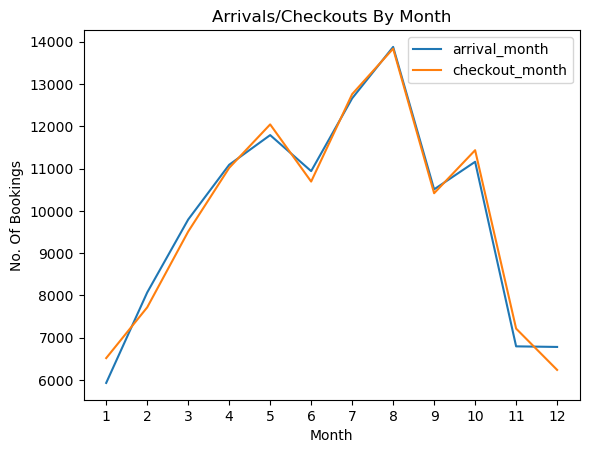

In [61]:
# visualise date variables
df1.groupby('arrival_month_no').size().plot(kind = 'line', label = 'arrival_month')
df1.groupby('checkout_month_no').size().plot(kind = 'line', label = 'checkout_month')

plt.xticks(range(1, 13, 1))
plt.xlabel('Month')
plt.ylabel('No. Of Bookings')
plt.title('Arrivals/Checkouts By Month')

plt.legend()
plt.show()

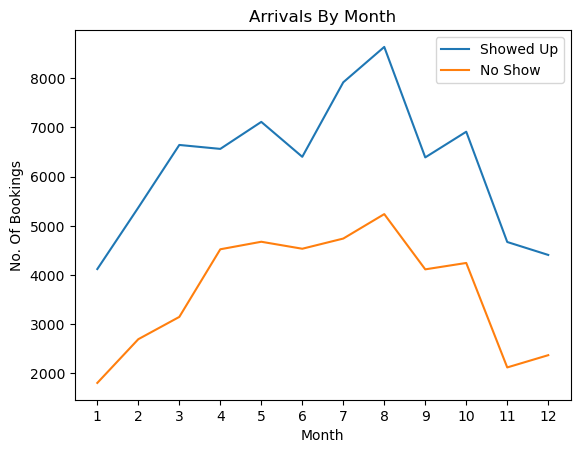

In [62]:
# visualise date variables
no_show_0.groupby('arrival_month_no').size().plot(kind = 'line', label = 'Showed Up')
no_show_1.groupby('arrival_month_no').size().plot(kind = 'line', label = 'No Show')

plt.xticks(range(1, 13, 1))
plt.xlabel('Month')
plt.ylabel('No. Of Bookings')
plt.title('Arrivals By Month')

plt.legend()
plt.show()

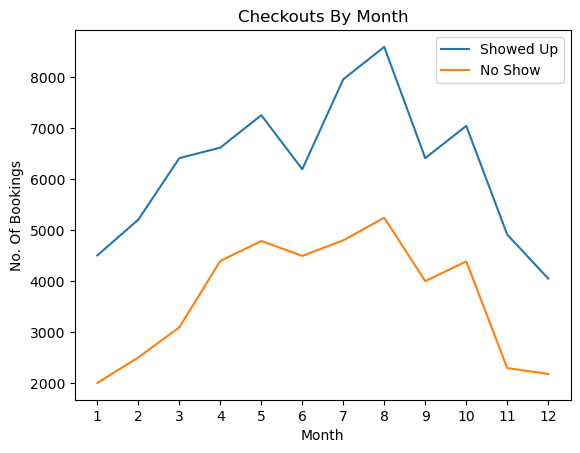

In [63]:
# visualise date variables
no_show_0.groupby('checkout_month_no').size().plot(kind = 'line', label = 'Showed Up')
no_show_1.groupby('checkout_month_no').size().plot(kind = 'line', label = 'No Show')

plt.xticks(range(1, 13, 1))
plt.xlabel('Month')
plt.ylabel('No. Of Bookings')
plt.title('Checkouts By Month')

plt.legend()
plt.show()

###  Observations:
* Most popular months for arrivals were May, July, August and October
* Least popular months for arrivals were January, February, November and December
* Arrivals and checkouts have similar trend, indicating that customers usually arrived and left in the same month
* Most no-shows were due to arrive/checkout between April and August
* Arrival month could be a reasonable predictor of no-show

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


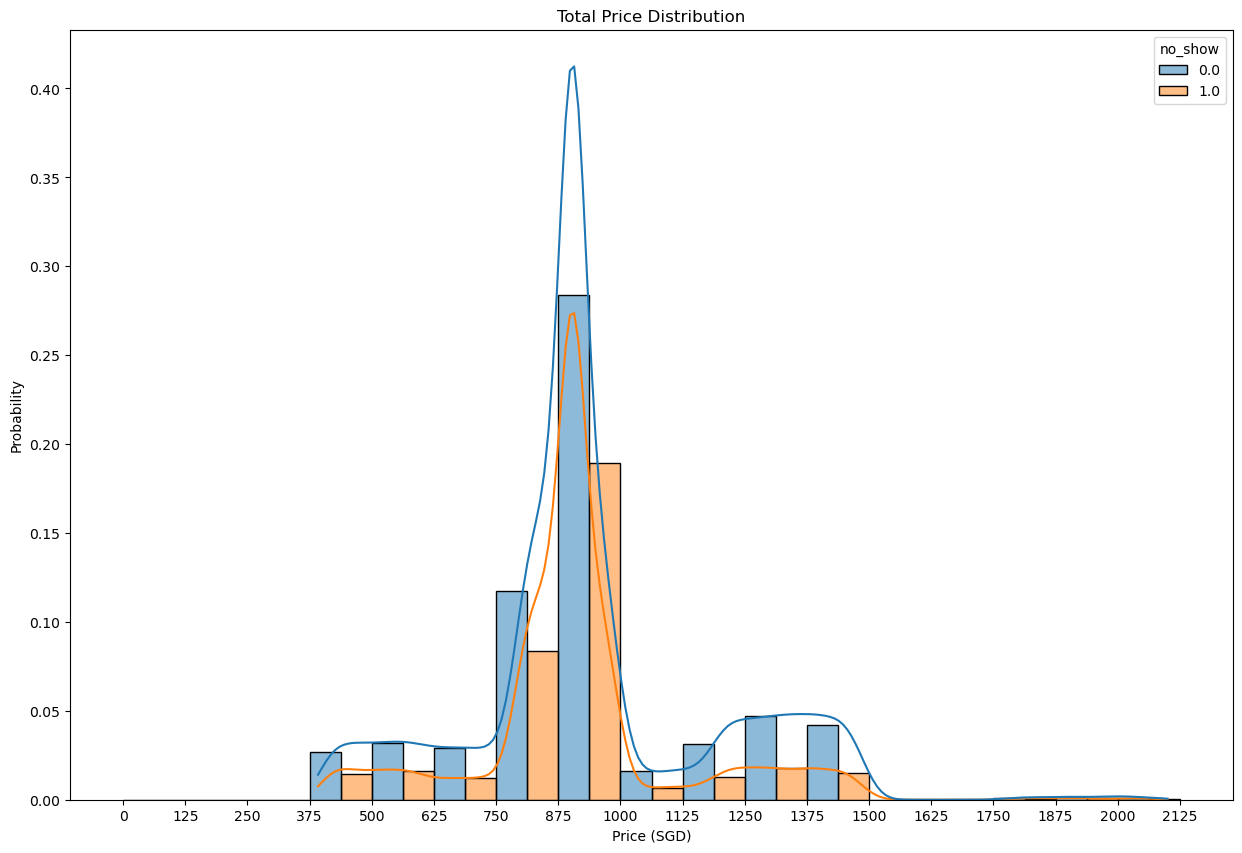

In [64]:
plt.figure(figsize = (15, 10))
sns.histplot(data = df1, x = 'price', hue = 'no_show', bins = range(0, 2250, 125), multiple = 'dodge', stat = 'probability', kde = True)

plt.xticks(range(0, 2250, 125))
plt.xlabel('Price (SGD)')
plt.title('Total Price Distribution')

plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


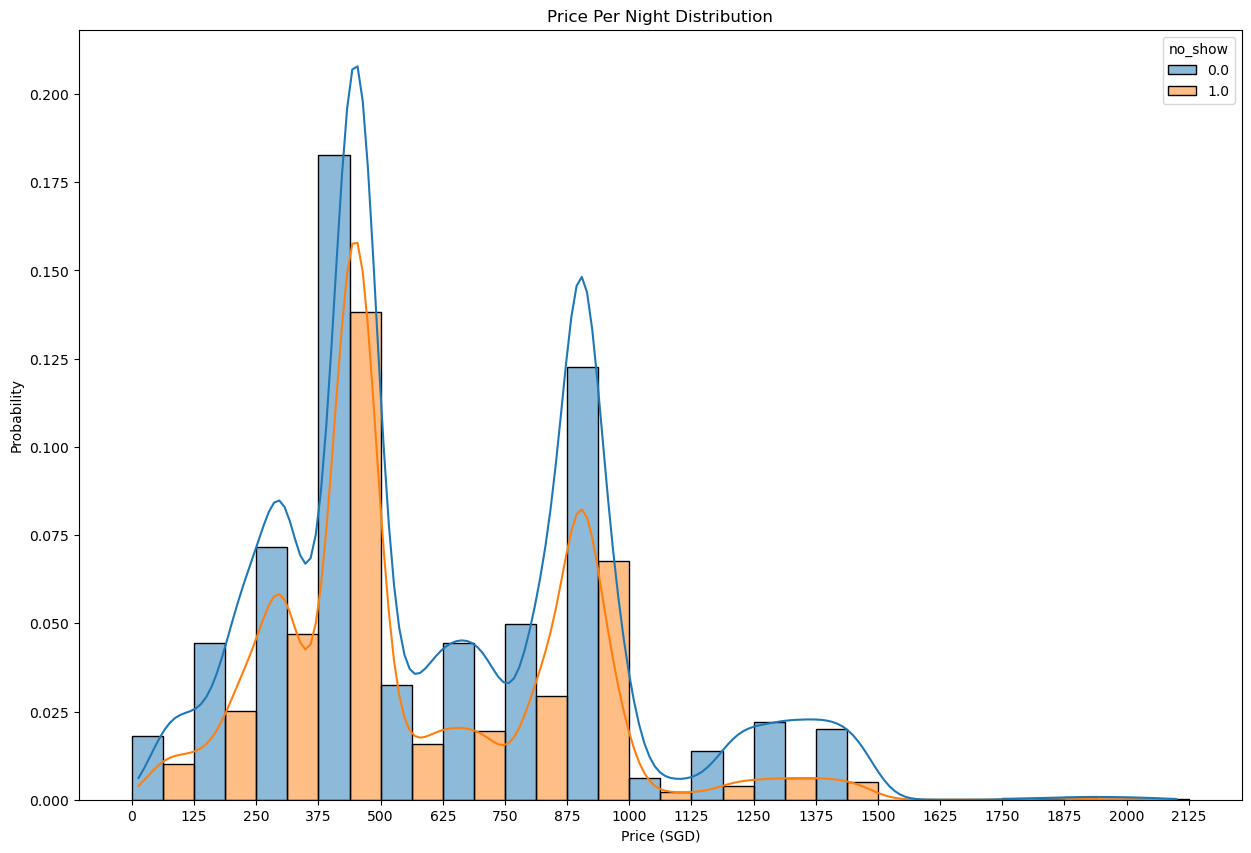

In [65]:
plt.figure(figsize = (15, 10))
sns.histplot(data = df1, x = 'price_per_night', hue = 'no_show', bins = range(0, 2250, 125), multiple = 'dodge', stat = 'probability', kde = True)

plt.xticks(range(0, 2250, 125))
plt.xlabel('Price (SGD)')
plt.title('Price Per Night Distribution')

plt.show()

###  Observations:
* Distribution of no_show classes (0 and 1) is similar overall
* Customers who paid SGD 750-100 in total, or SGD 375-500 and SGD 875-1000 per night were most probable to no-show
* At higher prices, the delta of both classes is observed to widen
* Price per night could be a reasonable predictor of no-show

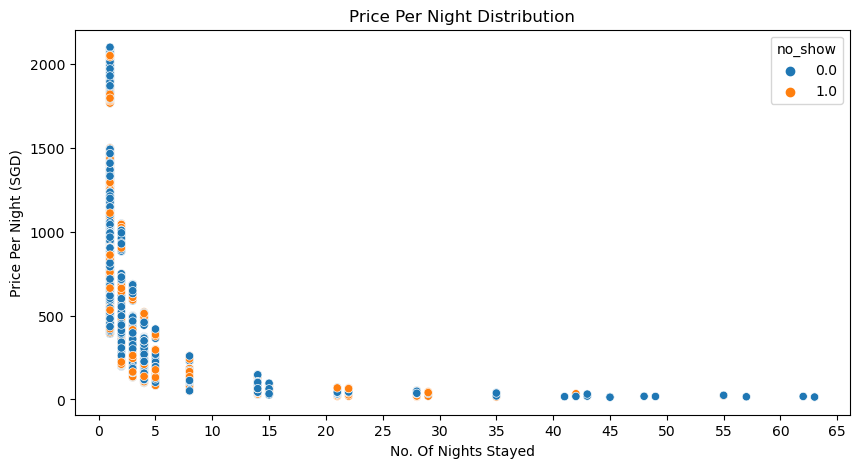

In [70]:
plt.figure(figsize = (10, 5))
sns.scatterplot(data = df1, y = 'price_per_night', x = 'nights_stayed', hue = 'no_show')

plt.xticks(range(0, 70, 5))
plt.xlabel('No. Of Nights Stayed')
plt.ylabel('Price Per Night (SGD)')
plt.title('Price Per Night Distribution')

plt.show()

### Observations:
* Most bookings stayed 5 nights or less
* Generally, the longer the stay, the less the price per night
* Generally, the longer the stay, the less no-shows
* Nights stayed could be a reasonable predictor of no-show

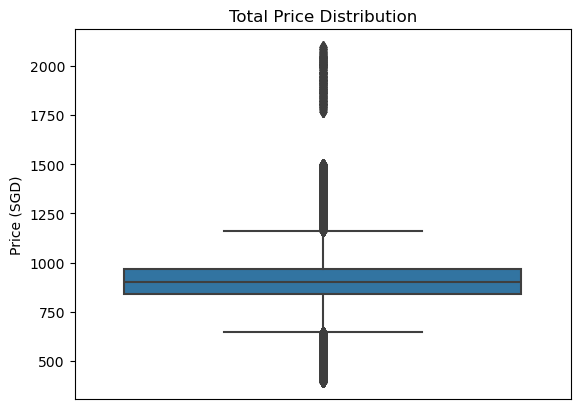

In [71]:
# visualise price distribution (boxplot)
sns.boxplot(data = df1['price'])

plt.xticks([])
plt.ylabel('Price (SGD)')
plt.title('Total Price Distribution')

plt.show()

In [72]:
# calculate outliers from boxplot

# retrieve q1, q3 and iqr
q1 = df1['price'].describe().loc['25%']
q3 = df1['price'].describe().loc['75%']
iqr = q3 - q1

# calculate outlier boundaries
condition1 = q1 - (1.5*iqr)
condition2 = q3 + (1.5*iqr)

# filter outliers
filtered = df1[(df1['price'] < condition1) | (df1['price'] > condition2)]
percentage_filtered = len(filtered) / len(df1['price']) * 100

print(f'Price outliers are < SGD {condition1:.1f} and > SGD {condition2:.1f}. They represent {percentage_filtered:.1f}% of the dataset.')

filtered_no_show_0 = filtered[filtered['no_show'] == 0.0]
percentage_filtered_no_show_0 = len(filtered_no_show_0) / len(filtered) * 100
                
filtered_no_show_1 = filtered[filtered['no_show'] == 1.0]
percentage_filtered_no_show_1 = len(filtered_no_show_1) / len(filtered) * 100

print(f'Out of all price outliers, {percentage_filtered_no_show_0:.1f}% of bookings showed up, and {percentage_filtered_no_show_1:.1f}% was no-show.')

Price outliers are < SGD 647.1 and > SGD 1158.6. They represent 26.2% of the dataset.
Out of all price outliers, 70.2% of bookings showed up, and 29.8% was no-show.


###  Observations:
* Outliers are a significant percentage (26.2%) of the dataset and should not be removed
* Proportions of no_show classes (0 and 1) for outliers is not far from reality in the total dataset
* Clipping is not recommended as it was observed that the probabilities of both classes varied more at higher prices

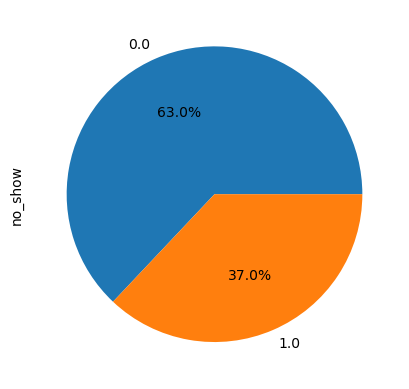

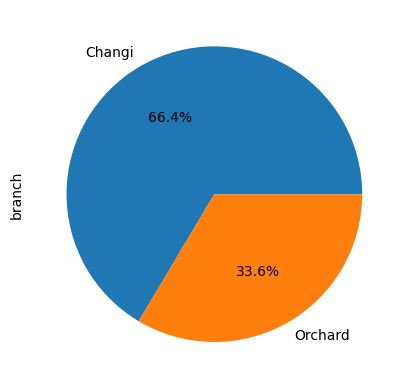

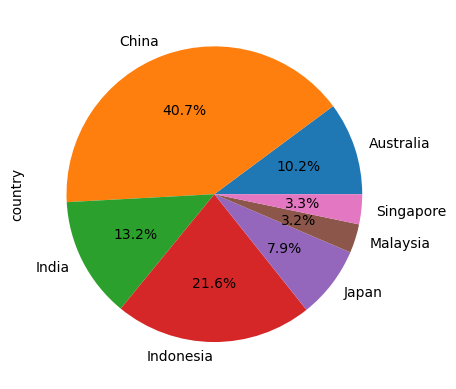

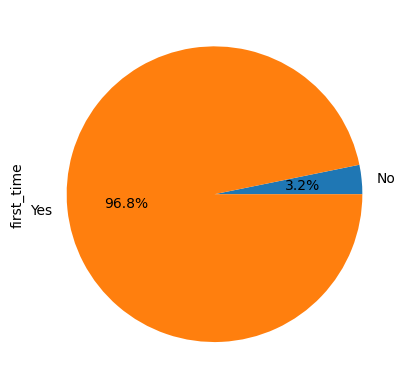

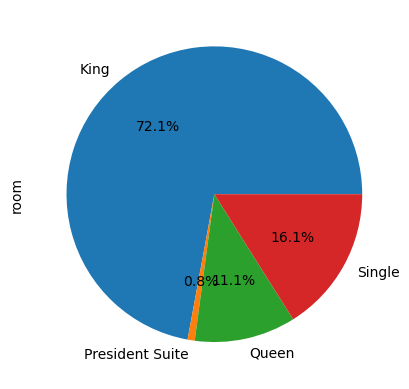

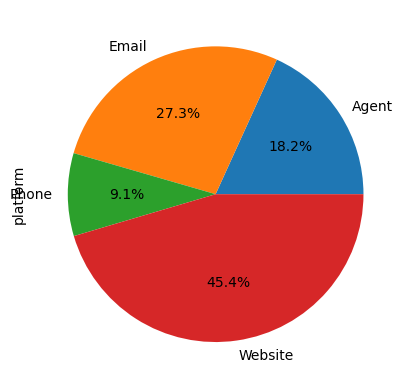

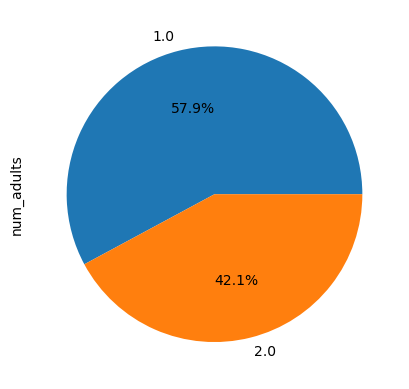

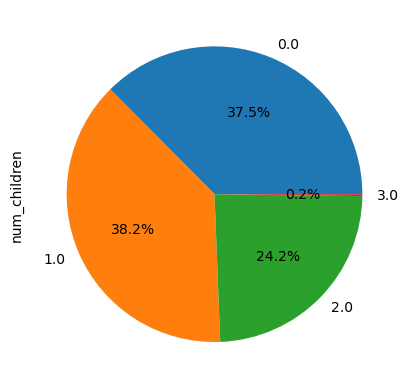

In [73]:
# visualise categorical variables
for i in range(len(df1.columns)):
    if i in (1, 2, 8, 9, 10, 12, 13, 14):
        df1.groupby(df1.columns[i]).size().plot(kind = 'pie',
                                             y = df1.columns[i],
                                             label = df1.columns[i],
                                             autopct = '%1.1f%%')
        plt.show()

###  Observations:
* Majority no_show class (63.0%) is 0.0, i.e. customer showed up
* Majority of bookings (66.4%) was for Changi branch
* Majority of bookings (62.3%) was from Chinese and Indonesian customers 
* Majority of bookings (96.8%) was from first-timers
* Majority of bookings (72.1%) was for King room type
* Highest contribution of bookings (45.4%) was from the website
* Majority of bookings (57.9%) had only one adult
* Majority of bookings (75.7%) had up to one child

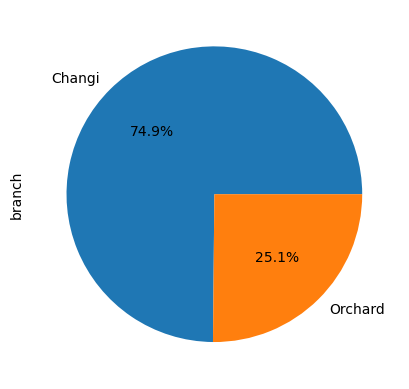

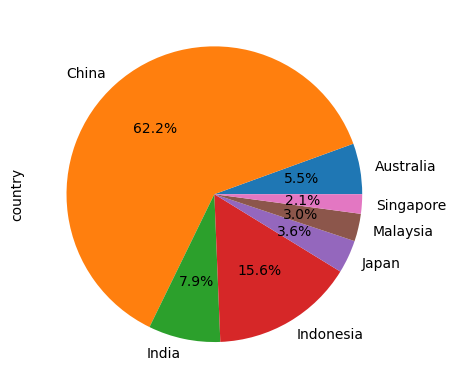

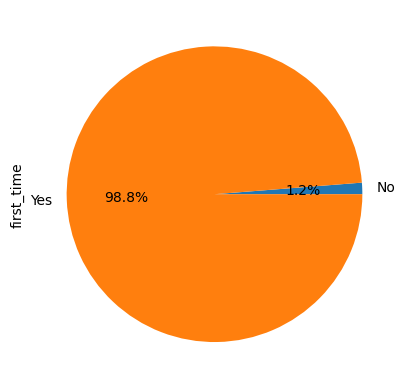

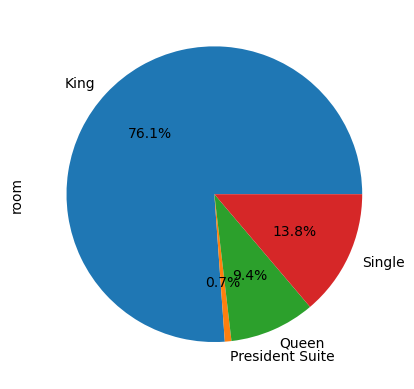

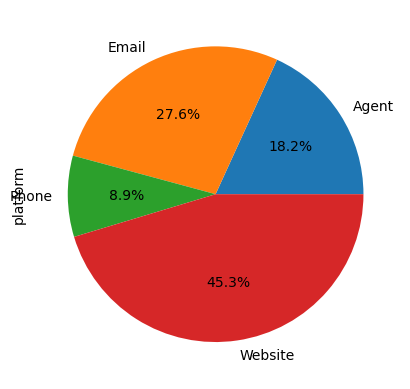

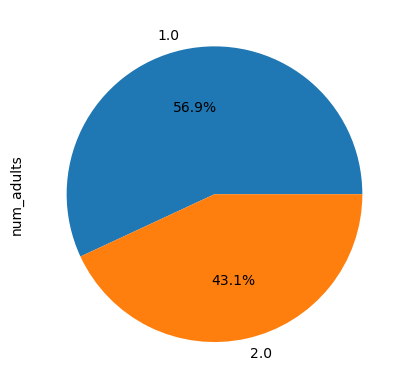

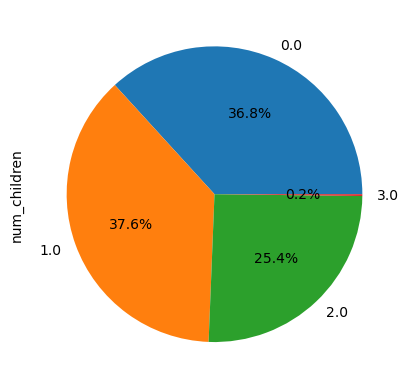

In [160]:
# visualise categorical variables
for i in range(len(no_show_1.columns)):
    if i in (2, 8, 9, 10, 12, 13, 14):
        no_show_1.groupby(no_show_1.columns[i]).size().plot(kind = 'pie',
                                             y = no_show_1.columns[i],
                                             label = no_show_1.columns[i],
                                             autopct = '%1.1f%%')
        plt.show()

###  Observations:
For no-shows,
* Proportion of bookings jumped to 74.9% for Changi branch
* Proportion of bookings from Chinese customers jumped to 62.2%
* Branch and Country could be reasonable predictors for no-show

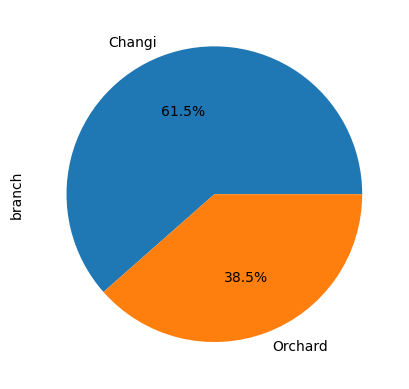

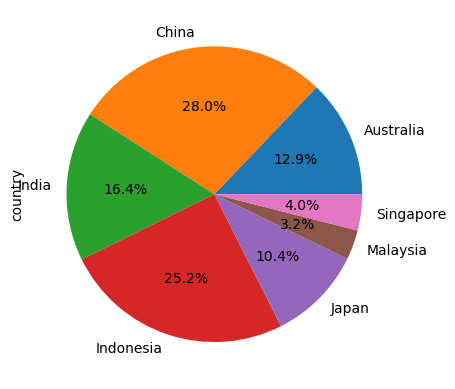

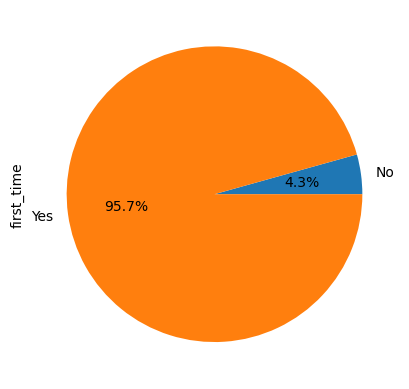

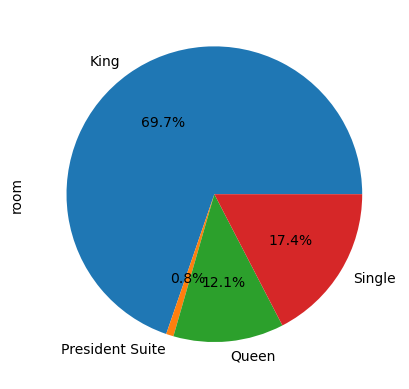

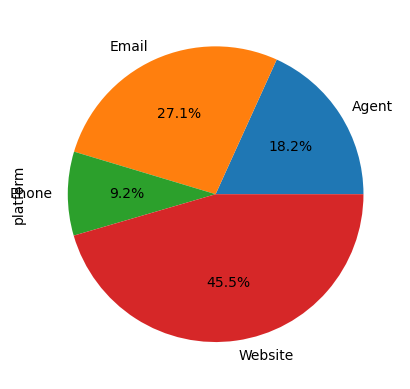

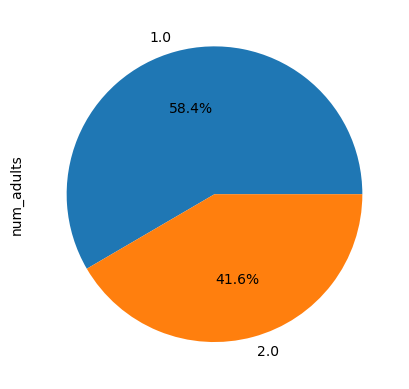

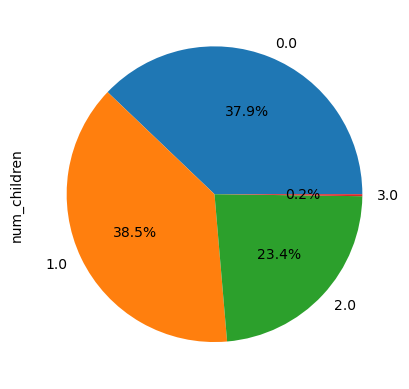

In [75]:
# visualise categorical variables
for i in range(len(no_show_0.columns)):
    if i in (2, 8, 9, 10, 12, 13, 14):
        no_show_0.groupby(no_show_0.columns[i]).size().plot(kind = 'pie',
                                             y = no_show_0.columns[i],
                                             label = no_show_0.columns[i],
                                             autopct = '%1.1f%%')
        plt.show()

###  Observations:
For customers that showed up,
* Proportion of bookings from Chinese customers decreased to 28.0%
* Country is further supported as a reasonable predictor for no-show
* Other proportions remained relatively similar to total dataset
* For room, the mode was King in both no_show classes, so we can impute null values with King

In [78]:
# impute room null values with King
df1['room'].fillna('King', inplace = True)
# check imputation, all columns should have 119390 non-null
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119390 entries, 0 to 119390
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   booking_id         119390 non-null  int64  
 1   no_show            119390 non-null  float64
 2   branch             119390 non-null  object 
 3   booking_month      119390 non-null  object 
 4   arrival_month      119390 non-null  object 
 5   arrival_day        119390 non-null  float64
 6   checkout_month     119390 non-null  object 
 7   checkout_day       119390 non-null  float64
 8   country            119390 non-null  object 
 9   first_time         119390 non-null  object 
 10  room               119390 non-null  object 
 11  price              119390 non-null  float64
 12  platform           119390 non-null  object 
 13  num_adults         119390 non-null  float64
 14  num_children       119390 non-null  float64
 15  arrival_month_no   119390 non-null  float64
 16  booking

### Prepare Data For Modeling

In [90]:
# create a copy
df2 = df1.copy()

In [91]:
# keep essential columns
df_subset = df2[[
    'no_show',
    'branch',
    'booking_month_no',
    'arrival_month_no',
    'country',
    'price_per_night',
    'nights_stayed'
    ]]

In [97]:
# transform branch values
df_subset['branch'] = df_subset['branch'].map(lambda x: 0.0 if x != 'Changi' else 1.0)

In [93]:
# one hot encoding for country categorical variable
df_subset = pd.get_dummies(df_subset, dtype = float)

In [98]:
# rebalance dataset

# split dataset into majority and minority classes
majority_class = df_subset[df_subset['no_show'] == 0.0]
minority_class = df_subset[df_subset['no_show'] == 1.0]

# downsample majority class
from sklearn.utils import resample

majority_downsample = resample(majority_class,
                              replace = True,
                              n_samples = len(minority_class),
                              random_state = 42)

no_show
1.0    44224
0.0    44224
Name: count, dtype: int64


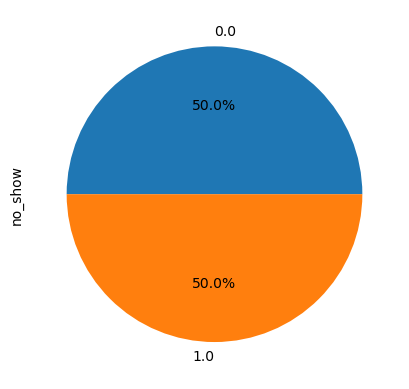

In [99]:
# form new dataset of downsampled majority and original minority classes
df_downsample = pd.concat([minority_class, majority_downsample])
print(df_downsample['no_show'].value_counts())

# visualise outcome
df_downsample.groupby('no_show').size().plot(kind = 'pie',
                                                 y = 'no_show',
                                                 label = 'no_show',
                                                 autopct = '%1.1f%%')

plt.show()

In [100]:
# upweight majority class
original_weight = len(majority_class) / len(df_subset)
downsampling_factor = len(majority_class) / len(majority_downsample)
example_weight = original_weight * downsampling_factor
print(f'Example weight is: {example_weight}')

Example weight is: 1.070081622857582


In [101]:
# add new column for example_weight
df_downsample['weight'] = [example_weight if ele == 0.0 else 0.0 for ele in df_downsample['no_show']]

In [102]:
# randomly shuffle dataset after concatenation
df_final = df_downsample.sample(frac = 1, random_state = 1, ignore_index = True)

In [103]:
# preview dataset
df_final.head()

,no_show,branch,booking_month_no,arrival_month_no,price_per_night,nights_stayed,country_Australia,country_China,country_India,country_Indonesia,country_Japan,country_Malaysia,country_Singapore,weight
0,0.0,0.0,2.0,6.0,340.9,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.1
1,1.0,0.0,7.0,9.0,456.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,1.0,451.6,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.1
3,1.0,0.0,10.0,9.0,924.9,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,8.0,9.0,1075.5,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [104]:
# set features
features = df_final.drop(columns = 'no_show', axis = 1)

In [105]:
# normalise features using Z-score scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(features)
scaled = scaler.fit_transform(features)

In [106]:
# preview normalised features
scaled_features = pd.DataFrame(scaled, columns = features.columns)
scaled_features.head()

,branch,booking_month_no,arrival_month_no,price_per_night,nights_stayed,country_Australia,country_China,country_India,country_Indonesia,country_Japan,country_Malaysia,country_Singapore,weight
0,0.0,-1.3,-0.2,-0.8,-0.1,-0.3,-0.9,-0.4,-0.5,3.6,-0.2,-0.2,1.0
1,0.0,0.1,0.8,-0.5,-0.1,-0.3,1.1,-0.4,-0.5,-0.3,-0.2,-0.2,-1.0
2,0.0,-1.6,-1.8,-0.5,-0.1,-0.3,-0.9,-0.4,2.0,-0.3,-0.2,-0.2,1.0
3,0.0,1.0,0.8,1.0,-0.5,-0.3,1.1,-0.4,-0.5,-0.3,-0.2,-0.2,-1.0
4,0.0,0.4,0.8,1.5,-0.5,-0.3,-0.9,-0.4,2.0,-0.3,-0.2,-0.2,-1.0


In [107]:
# set label
Y = df_final['no_show']

In [109]:
# split final dataset into training and testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(scaled_features, Y, test_size = 0.2, random_state = 1)

### Logistic Regression

In [110]:
from sklearn.linear_model import LogisticRegression

In [111]:
LR = LogisticRegression(solver = 'liblinear')
LR.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

In [112]:
predictions = LR.predict(x_test)

In [113]:
predict_proba = LR.predict_proba(x_test)

In [115]:
import sklearn.metrics as metrics

In [116]:
LR_Accuracy_Score = metrics.accuracy_score(y_test, predictions)
LR_F1_Score = metrics.f1_score(y_test, predictions)
LR_Log_Loss = metrics.log_loss(y_test, predict_proba)

In [124]:
Report = pd.DataFrame({'Metrics': ['Accuracy Score', 'F1 Score', 'Log Loss'],
                       ' ': [LR_Accuracy_Score, LR_F1_Score, LR_Log_Loss]})
Report.set_index('Metrics')

,
Metrics,
Accuracy Score,1.0
F1 Score,1.0
Log Loss,0.0
